<a href="https://colab.research.google.com/github/Shalha-Mucha18/Convolutional-neural-network-CNN-/blob/main/Horse%20or%20Human%20Image%20Classification%20Using%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip


--2022-04-20 10:21:18--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   217MB/s    in 0.7s    

2022-04-20 10:21:19 (217 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-04-20 10:21:21--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  43.4MB/s    in 0.3s    

2022-04-20 10:21:21 (43.4 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]



In [ ]:
#unzip both file
import zipfile
#unzip the train set
zif_ref=zipfile.ZipFile('/content/horse-or-human.zip','r')
zif_ref.extractall('/content/horse-or-human')
#unzip the validation set
zif_ref=zipfile.ZipFile('/content/validation-horse-or-human.zip','r')
zif_ref.extractall('/content/validation-horse-or-human')

zif_ref.close()

In [ ]:
#define directories which containing the  images
import os
# Directory with training horse pictures
train_horse_dir=os.path.join('/content/horse-or-human/horses')
print(train_horse_dir)
# Directory with training human pictures
train_human_dir=os.path.join('/content/horse-or-human/humans')
print(train_human_dir)
#Directory with validation human pictures
validation_horse_dir=os.path.join('/content/validation-horse-or-human/horses')
print(validation_horse_dir)
#Directory with validation human pictures
validation_human_dir=os.path.join('/content/validation-horse-or-human/humans')
print(validation_human_dir)




In [ ]:
#show some filename in dir
train_horse_names=os.listdir(train_horse_dir)
print('Train set horses:',train_horse_names[:5])
train_human_names=os.listdir(train_human_dir)
print('Train set humans:',train_human_names[:5])

validation_horse_names=os.listdir(validation_horse_dir)
print('Validation set horses:',validation_horse_names[:5])

validation_human_names=os.listdir(validation_human_dir)
print('Validation set humans:',validation_human_names[:5])


Train set horses: ['horse18-0.png', 'horse38-0.png', 'horse26-6.png', 'horse15-1.png', 'horse33-4.png']
Train set humans: ['human09-05.png', 'human04-14.png', 'human16-26.png', 'human04-09.png', 'human09-18.png']
Validation set horses: ['horse1-127.png', 'horse3-326.png', 'horse1-241.png', 'horse4-000.png', 'horse2-383.png']
Validation set humans: ['valhuman05-20.png', 'valhuman05-16.png', 'valhuman01-00.png', 'valhuman04-08.png', 'valhuman02-09.png']


In [ ]:
#finding the total number horse and human images in dir
print('Total number of training horses image:',len(train_horse_names))
print('Total number of training human image:',len(train_human_names))

print('Total number of validation horses image:',len(validation_horse_names))
print('Total number of validation human image:',len(validation_human_names))

Total number of training horses image: 500
Total number of training human image: 527
Total number of validation horses image: 128
Total number of validation human image: 128


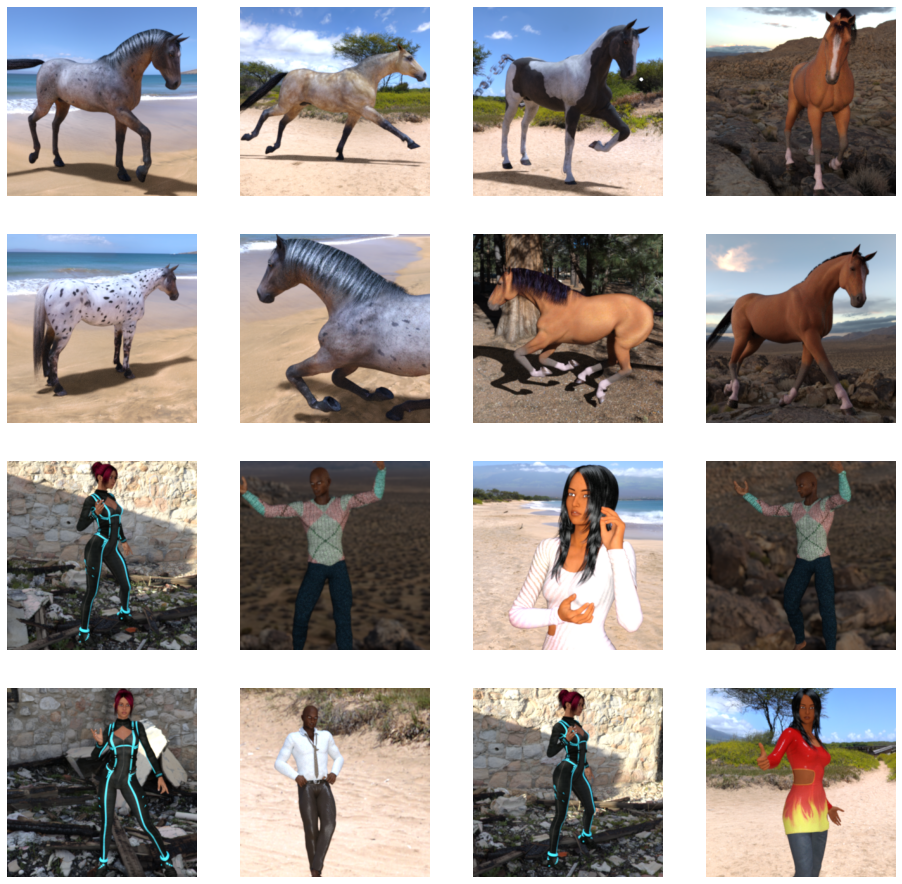

In [ ]:
#display somme pictures in dir

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows=4
ncols=4
pic_index=0
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index +=8
next_horse_pix=[ os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix=[ os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
   sp=plt.subplot(nrows,ncols,i+1)
   sp.axis('off') 
   img=mpimg.imread(img_path)
   plt.imshow(img)
plt.show()  


In [ ]:
#build a model
import tensorflow as tf

model=tf.keras.models.Sequential([
    #first conv
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2), 
    #secomd conv
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    #third conv
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth conv
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    #fifth conv
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the result to feed into a DNN
    tf.keras.layers.Flatten(),
    #512 hidden layers
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
# display network architecture and the output shapes by model.summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
#comple setting for the model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
#convert image into array using ImageDataGenerator from keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

train_data=train_datagen.flow_from_directory(
    '/content/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')
validation_data=validation_datagen.flow_from_directory(
    '/content/validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
#train the model
history = model.fit(
      train_data,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_data,
      )

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 1.1992 - accuracy: 0.5628 - val_loss: 0.6557 - val_accuracy: 0.8320
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.6123 - accuracy: 0.7520 - val_loss: 1.0561 - val_accuracy: 0.5273
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.6205 - accuracy: 0.6874 - val_loss: 0.4785 - val_accuracy: 0.7969
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.7670 - accuracy: 0.8254 - val_loss: 1.3426 - val_accuracy: 0.7070
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.2072 - accuracy: 0.9333 - val_loss: 0.6556 - val_accuracy: 0.8750
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.4053 - accuracy: 0.8732 - val_loss: 0.6264 - val_accuracy: 0.8711
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.1829 - accuracy: 0.9255 - val_loss: 3.3217 - val_accuracy: 0.6055
Epoch 8/15
8/8 [========================

In [ ]:
#model prediction
import numpy as np
from google.colab import files
from keras.preprocessing import  image
uploaded=files.upload()
for fn in uploaded.keys():
  
  path='/content/'+ fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x/=255.0
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse') 

Saving girl-1026246_640.jpg to girl-1026246_640.jpg
[0.9999484]
girl-1026246_640.jpg is a human
